# PREVISÃO DE SERIES TEMPORAIS

A previsão de séries temporais é uma técnica amplamente utilizada em diversas áreas, como economia, finanças, meteorologia e engenharia. Ela consiste em analisar dados históricos sequenciais para identificar padrões e tendências, com o **objetivo de prever valores futuros**. Diferente de outras formas de análise de dados, a previsão de séries temporais **leva em conta a ordem temporal dos dados**, o que é crucial para capturar a dinâmica temporal e as interdependências ao longo do tempo.

Existem diversas abordagens para a previsão de séries temporais, incluindo métodos clássicos e modernos. Entre os métodos clássicos, destacam-se o modelo **ARIMA** (AutoRegressive Integrated Moving Average) e o modelo de suavização exponencial. Esses métodos são baseados em conceitos estatísticos e requerem uma análise detalhada da estrutura da série temporal, como estacionariedade e sazonalidade.

Com o avanço da computação e da inteligência artificial, métodos baseados em aprendizado de máquina e redes neurais têm ganhado popularidade. Modelos como **LSTM (Long Short-Term Memory) e redes neurais recorrentes** são capazes de capturar padrões complexos e não-lineares nas séries temporais, muitas vezes resultando em previsões mais precisas.

A escolha do método mais adequado depende de vários fatores, incluindo a natureza dos dados, a complexidade do padrão temporal e a precisão desejada. A avaliação dos modelos é feita através de métricas como o erro absoluto médio (MAE) e o erro quadrático médio (MSE), que quantificam a precisão das previsões.

Em suma, a previsão de séries temporais é uma ferramenta poderosa que, quando aplicada corretamente, pode fornecer insights valiosos e suportar a tomada de decisões em diversas áreas.

Uma série temporal é formada por quatro componentes principais: **tendência (trend)**, que representa mudanças diretas ao longo do tempo, como aumento ou diminuição; **sazonalidade (seasonality)**, que se refere a padrões que se repetem periodicamente, como eventos anuais; **irregularidades (irregularity)**, que são os ruídos ou resíduos imprevisíveis; e **cíclico (cyclic)**, que engloba eventos recorrentes, porém não fixos. Para aplicar a predição temporal, é crucial que o dataset seja **estacionário**, ou seja, que tenha média constante, variância constante e autocovariância independente do tempo. A estacionariedade pode ser verificada utilizando métodos como o teste ADF (Augmented Dickey-Fuller), que ajuda a determinar a influência de tendências na série temporal.

## Prevendo número de passageiros de uma companhia aérea dos EUA

link do dataset: https://www.kaggle.com/datasets/rakannimer/air-passengers?select=AirPassengers.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns          

**Carregando os dados**

In [2]:
path = 'AirPassengers.csv'
df = pd.read_csv(path)
df.columns = ['Data','Numero de Passageiros']
df.head()

,Data,Numero de Passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**Visualizando os dados**

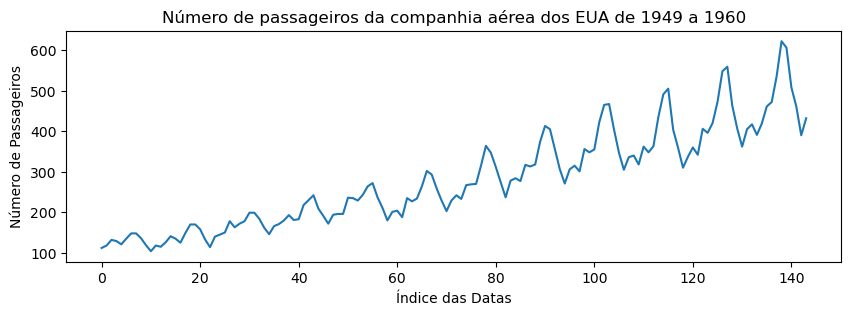

In [3]:
plt.figure(figsize=(10, 3))
plt.plot(df.index, df['Numero de Passageiros'])
plt.xlabel('Índice das Datas')
plt.ylabel('Número de Passageiros')
plt.title('Número de passageiros da companhia aérea dos EUA de 1949 a 1960')
plt.show()

**Ajustando os dados para o modelo Arima**

In [4]:
# df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m')
df.set_index('Data', inplace=True)
df.index = pd.PeriodIndex(df.index, freq="M")

**Dividindo em treino e teste**

In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split

y = df['Numero de Passageiros']
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

**Treinando e Avaliando o Modelo**

In [7]:
# pip install sktime
# pip install pmdarima
# from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, MeanRelativeAbsoluteError, mean_squared_error

arima_forecasting = AutoARIMA(sp=12, suppress_warnings=True)
arima_forecasting.fit(y_train)

y_pred = arima_forecasting.predict(fh=y_test.index)

# Calcular as métricas
mae = MeanAbsoluteError()
mae = mae(y_test, y_pred)
mse = MeanSquaredError()
mse = mse(y_test, y_pred)
rmse = MeanSquaredError(square_root=True)
rmse = rmse(y_test, y_pred)
mape = MeanAbsolutePercentageError()
mape = mape(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 28.54740876572377
MSE: 1230.80377218658
RMSE: 35.08281305976732
MAPE: 0.06124549619418014


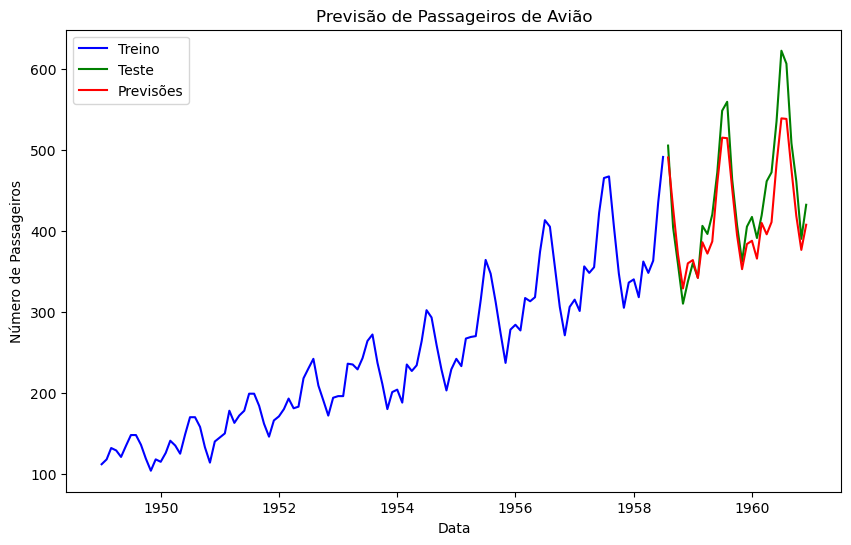

In [8]:
# Converter o índice PeriodIndex para datetime
y_train.index = y_train.index.to_timestamp()
y_test.index = y_test.index.to_timestamp()
y_pred.index = y_pred.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Treino', color='blue')
plt.plot(y_test.index, y_test, label='Teste', color='green')
plt.plot(y_test.index, y_pred, label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Previsão de Passageiros de Avião')
plt.legend()
plt.show()

## Prevendo preços futuros de ações

In [2]:
# pip install yfinance
# pip install prophet
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

import warnings
warnings.filterwarnings("ignore")

**Aquisição dos dados**

Iremos buscar nossos dados históricos de ações no site: [br.financas.yahoo.com](https://br.financas.yahoo.com)


In [40]:
# exemplos de ativos: 'GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA'
# yf.download(codigo, start='2015-01-01', end='2016-01-01')['Close']

codigo = "PETR4.SA"
df = yf.Ticker(codigo).history("5y")

In [41]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-09 00:00:00-03:00,9.097958,9.232871,9.028772,9.091040,36641500,0.0,0.0
2019-08-12 00:00:00-03:00,8.966505,8.966505,8.835052,8.873104,36122000,0.0,0.0
2019-08-13 00:00:00-03:00,8.841726,9.110185,8.796401,8.991645,45330500,0.2,0.0
2019-08-14 00:00:00-03:00,8.806861,8.848698,8.639510,8.688320,54401100,0.0,0.0
2019-08-15 00:00:00-03:00,8.712727,8.716213,8.416375,8.447754,53894500,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00-03:00,34.799999,35.700001,34.599998,35.700001,44765900,0.0,0.0
2024-08-06 00:00:00-03:00,35.599998,36.660000,35.340000,36.320000,36009000,0.0,0.0
2024-08-07 00:00:00-03:00,36.700001,36.750000,36.000000,36.270000,25020500,0.0,0.0


**Tratando os dados**

In [42]:
# Observação: o prophert necessita das colunas ds e y

dados = df.reset_index()
dados["Date"] = dados["Date"].dt.date
dados = dados[["Date", "Close"]]
dados.columns = ["ds", "y"]

In [43]:
dados

,ds,y
0,2019-08-09,9.091040
1,2019-08-12,8.873104
2,2019-08-13,8.991645
3,2019-08-14,8.688320
4,2019-08-15,8.447754
...,...,...
1240,2024-08-05,35.700001
1241,2024-08-06,36.320000
1242,2024-08-07,36.270000
1243,2024-08-08,36.849998


**Treinando o Modelo**

In [44]:
model = Prophet()
model.fit(dados)

19:25:33 - cmdstanpy - INFO - Chain [1] start processing
19:25:33 - cmdstanpy - INFO - Chain [1] done processing


**Gerando previsões**

In [45]:
periodo = model.make_future_dataframe(periods=365)

In [46]:
y_pred = model.predict(periodo)

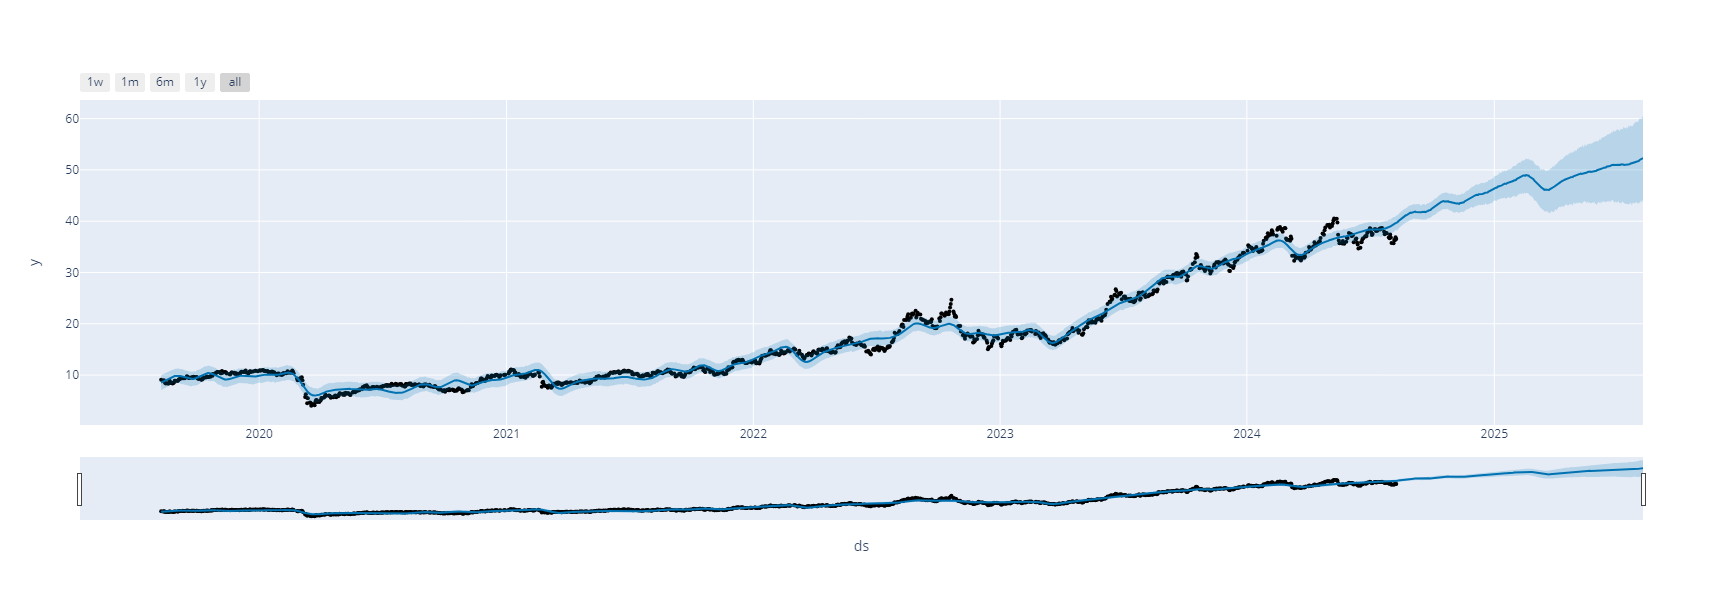

In [47]:
plot_plotly(model, y_pred)

### Avaliando o modelo prophet

In [52]:
split_index = int(len(dados) * 0.2)
dados_treino = dados[:split_index]
dados_teste = dados[split_index:]

In [53]:
modelo = Prophet()
modelo.fit(dados_treino)

19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
previsoes = modelo.predict(dados_teste.drop(columns=['y']))

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = dados_teste['y'].values
y_pred = previsoes['yhat'].values

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 50.25633016171685
MAE: 6.301345964876665
RMSE: 7.089169920499638
R²: 0.4819337379327524


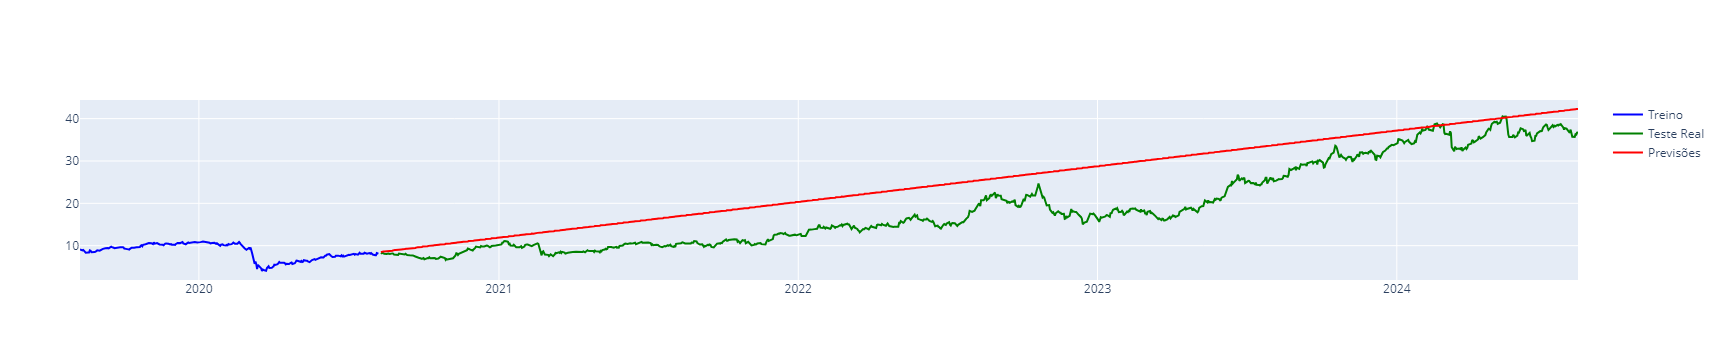

In [56]:
previsoes['y_real'] = dados_teste['y'].reset_index(drop=True)

from plotly import graph_objs as go

fig = go.Figure()

# Adicionando os dados de treino
fig.add_trace(go.Scatter(
    x=modelo.history['ds'],
    y=modelo.history['y'],
    mode='lines',
    name='Treino',
    line=dict(color='blue')
))

# Adicionando os dados de teste reais
fig.add_trace(go.Scatter(
    x=previsoes['ds'],
    y=previsoes['y_real'],
    mode='lines',
    name='Teste Real',
    line=dict(color='green')
))

# Adicionando as previsões
fig.add_trace(go.Scatter(
    x=previsoes['ds'],
    y=previsoes['yhat'],
    mode='lines',
    name='Previsões',
    line=dict(color='red')
))

# Mostrando o gráfico
fig.show()
